In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data sets

In [16]:
df=pd.read_csv('diamonds.csv', index_col=0)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Found and remove unrelated values and NAN

In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [19]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Found and Remove Outliers 

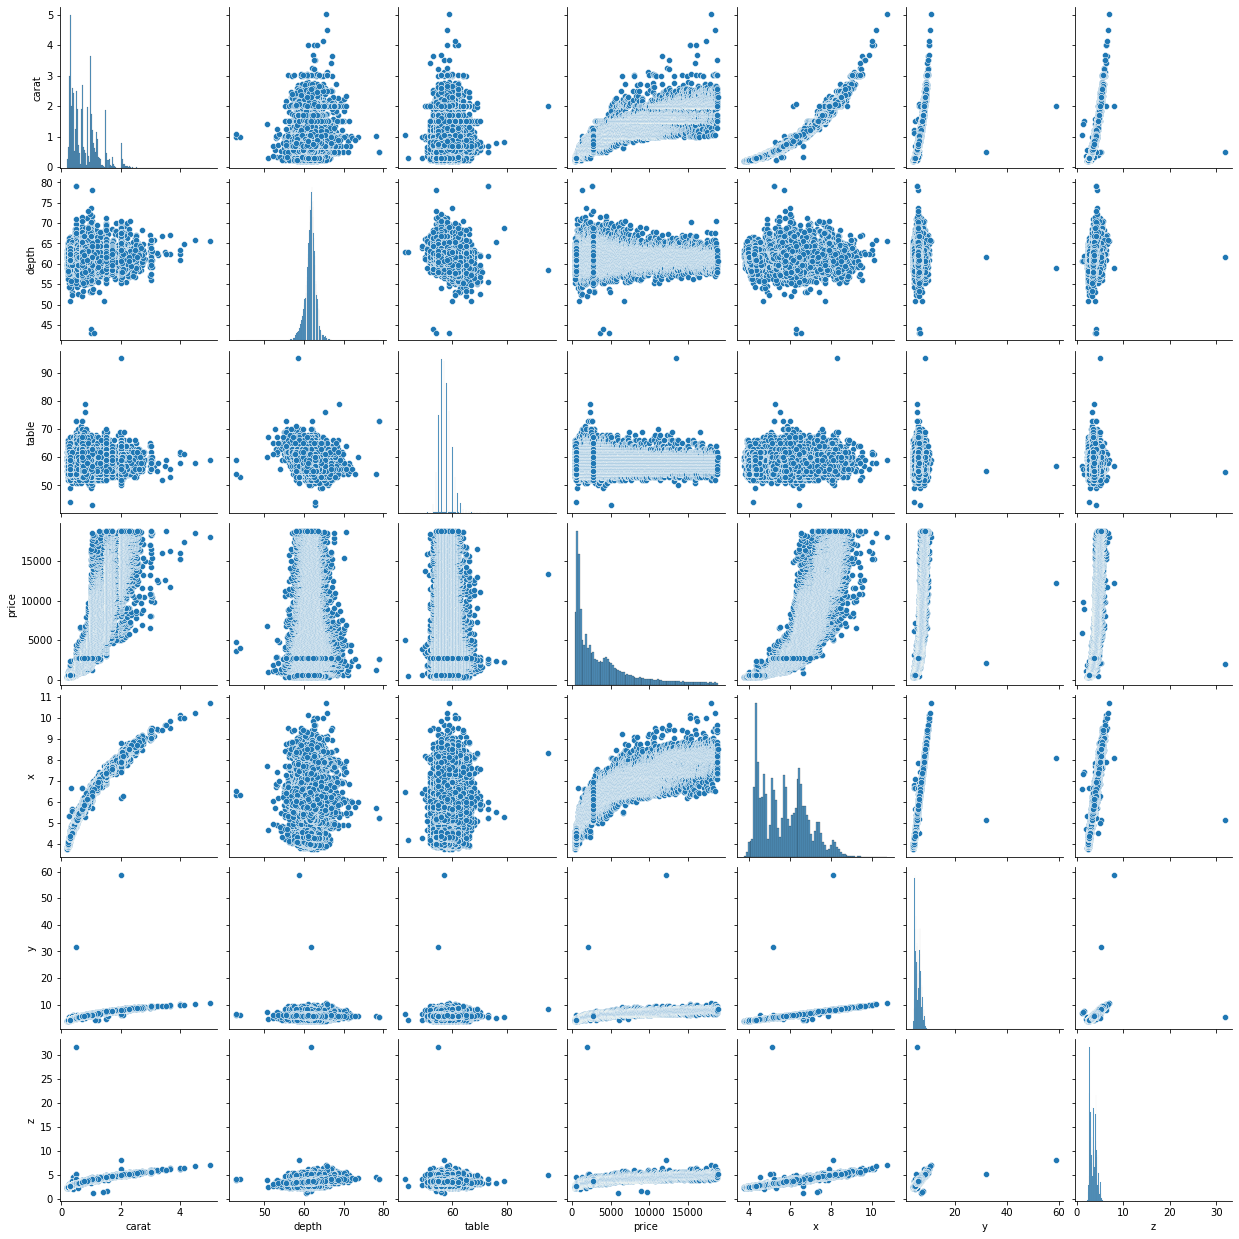

In [20]:
sns.pairplot(df)

Text(0.5, 1.0, 'Reg line on price vs Y')

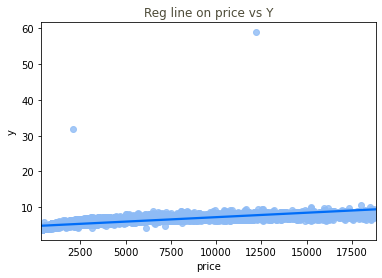

In [24]:
ax=sns.regplot(x='price', y='y',data=df, fit_reg=True, scatter_kws={"color": "#8EBBF5"}, line_kws={"color": "#006DF8"})
ax.set_title("Reg line on price vs Y", color="#4e4c39")

Text(0.5, 1.0, 'Reg line on price vs X')

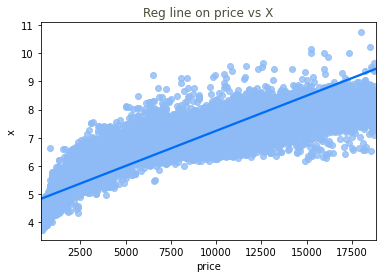

In [25]:
ax=sns.regplot(x='price', y='x',data=df, fit_reg=True, scatter_kws={"color": "#8EBBF5"}, line_kws={"color": "#006DF8"})
ax.set_title("Reg line on price vs X", color="#4e4c39")

Text(0.5, 1.0, 'Reg line on price vs Z')

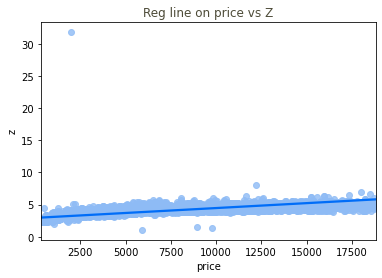

In [26]:
ax=sns.regplot(x='price', y='z',data=df, fit_reg=True, scatter_kws={"color": "#8EBBF5"}, line_kws={"color": "#006DF8"})
ax.set_title("Reg line on price vs Z", color="#4e4c39")

Text(0.5, 1.0, 'Reg line on price vs depth')

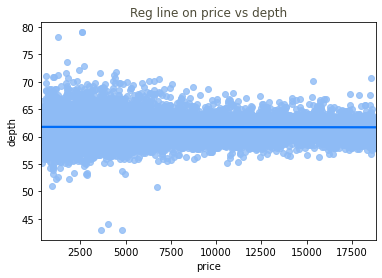

In [27]:
ax=sns.regplot(x='price', y='depth',data=df, fit_reg=True, scatter_kws={"color": "#8EBBF5"}, line_kws={"color": "#006DF8"})
ax.set_title("Reg line on price vs depth", color="#4e4c39")

Text(0.5, 1.0, 'Reg line on price vs table')

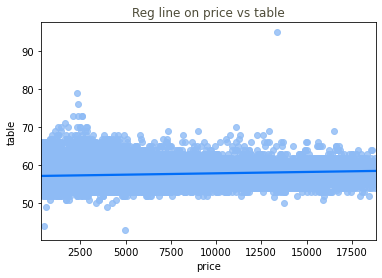

In [28]:
ax=sns.regplot(x='price', y='table',data=df, fit_reg=True, scatter_kws={"color": "#8EBBF5"}, line_kws={"color": "#006DF8"})
ax.set_title("Reg line on price vs table", color="#4e4c39")

In [30]:
df = df[(df["depth"]<75)&(df["depth"]>50)]
df.shape

(53914, 10)

In [32]:
df = df[(df["table"]<75)&(df["table"]>45)]
df.shape

(53909, 10)

In [33]:
df = df[(df["x"]<10)]
df = df[(df["y"]<10)]
df = df[(df["z"]<10)]
df.shape

(53900, 10)

# Found Categorical Variables 

In [49]:
#list out categorical variable
c = (df.dtypes =="object")
Col_Obj = list(c[c].index)
print("Categorical variables:")
print(Col_Obj)

Categorical variables:
['cut', 'color', 'clarity']


In [42]:
shade = ["#F16549", "#F1DA49", "#8BF149", "#49F1E2", "#4977F1"]
shade

['#F16549', '#F1DA49', '#8BF149', '#49F1E2', '#4977F1']

Text(0.5, 0, 'Cut')

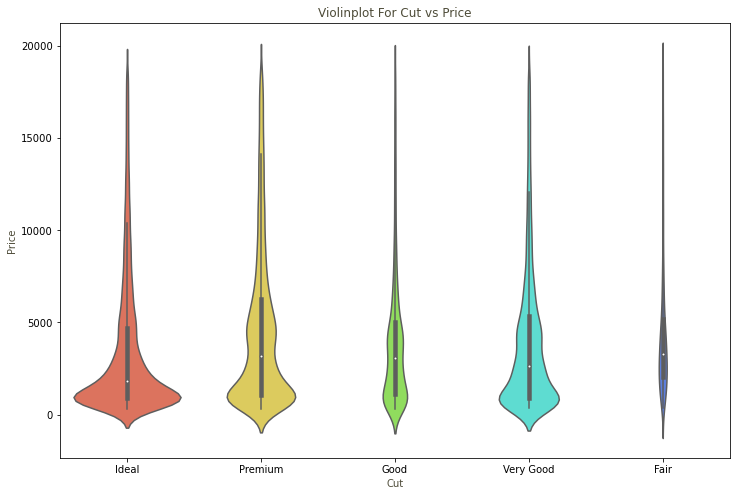

In [43]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

Text(0.5, 0, 'Clarity')

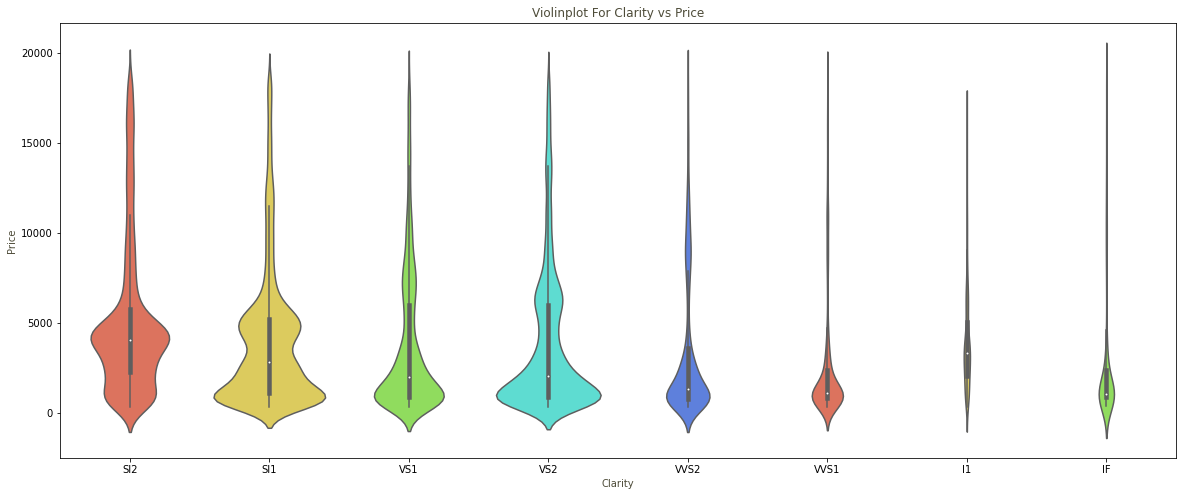

In [46]:
plt.figure(figsize=(20,8))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Text(0.5, 0, 'Color')

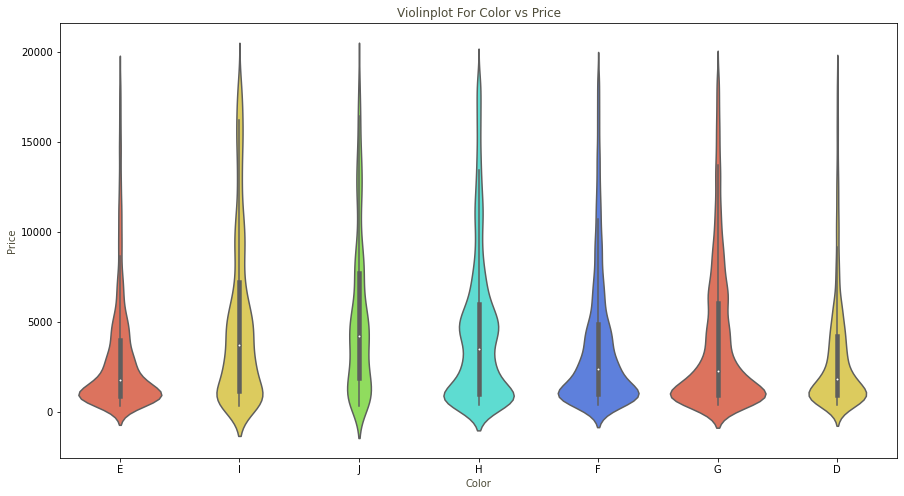

In [45]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="color",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cqolor", color="#4e4c39")

# Lable Encoding of categorical Variable

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
df1=df.copy()
label= LabelEncoder()
for col in Col_Obj:
    df1[col] = label.fit_transform(df1[col])
df1.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df.describe()

,carat,depth,table,price,x,y,z
count,53900.000000,53900.000000,53900.000000,53900.000000,53900.000000,53900.000000,53900.000000
mean,0.797276,61.749236,57.455358,3929.502913,5.731072,5.732921,3.539001
std,0.472368,1.419522,2.221156,3985.259080,1.118489,1.110395,0.690960
min,0.200000,50.800000,49.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.030000
max,3.670000,73.600000,73.000000,18823.000000,9.860000,9.810000,6.380000


<AxesSubplot:>

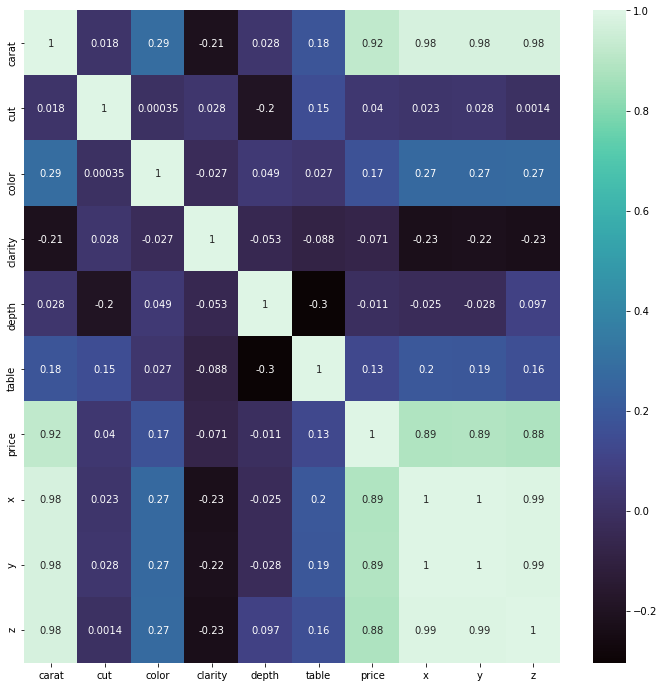

In [58]:
#Check dependenc   y of Price on Features
dep= df1.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dep,cmap="mako",annot=True)

# Let's Build a ML Model

In [73]:
# Define X and Y values
from sklearn.model_selection import train_test_split
X= df1.drop(["price","x","y","z"],axis =1)
Y= df1["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state=7)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
Score={}
i=0
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    Score[pipe_dict[i]]=pipe.score(X_test, Y_test)
    i+=1

In [95]:
Score

{'LinearRegression': 0.8828941353506493,
 'DecisionTree': 0.9666335901811199,
 'RandomForest': 0.980726789676569,
 'KNeighbors': 0.951645490134668,
 'XGBRegressor': 0.9819240115411292}

In [84]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1374.929572 
DecisionTree: -738.104305 
RandomForest: -560.909389 
KNeighbors: -892.710743 
XGBRegressor: -546.827291 


In [96]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np 
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9819240115411292
Adjusted R^2: 0.9819159586802179
MAE: 277.8376920614437
MSE: 285114.928057267
RMSE: 533.961541739915


In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]